# Callbacks

## 模型

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 建立模型
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


2024-10-05 11:25:59.234521: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-05 11:25:59.259140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 11:25:59.294273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 11:25:59.298060: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 11:25:59.323669: I tensorflow/core/platform/cpu_feature_guar

## EarlyStopping callbacks

In [2]:
# validation loss 三個執行週期沒改善就停止訓練
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_accuracy"),
]

In [3]:
# 訓練 20 次，但實際只訓練 12次就停止了
history = model.fit(
    x_train_norm, y_train, epochs=20, validation_split=0.2, callbacks=my_callbacks
)

Epoch 1/20


I0000 00:00:1728098824.186442    8315 service.cc:146] XLA service 0x7f2b0c01acb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728098824.186673    8315 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-05 11:27:04.237472: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-05 11:27:04.389677: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  77/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5601 - loss: 1.4055

I0000 00:00:1728098825.519153    8315 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8641 - loss: 0.4594 - val_accuracy: 0.9584 - val_loss: 0.1400
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9600 - loss: 0.1316 - val_accuracy: 0.9703 - val_loss: 0.1007
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9723 - loss: 0.0918 - val_accuracy: 0.9723 - val_loss: 0.0952
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9796 - loss: 0.0683 - val_accuracy: 0.9735 - val_loss: 0.0865
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0529 - val_accuracy: 0.9752 - val_loss: 0.0755
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0451 - val_accuracy: 0.9776 - val_loss: 0.0723
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0386 - val_accuracy: 0.9795 - val_loss: 0.0710
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accurac

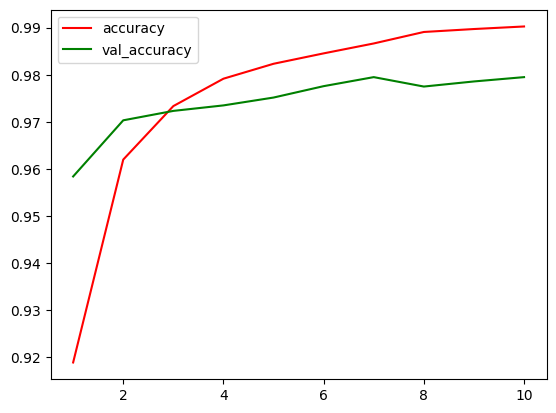

In [4]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    np.arange(1, len(history.history["accuracy"]) + 1),
    history.history["accuracy"],
    "r",
    label="accuracy",
)
plt.plot(
    np.arange(1, len(history.history["accuracy"]) + 1),
    history.history["val_accuracy"],
    "g",
    label="val_accuracy",
)
plt.legend()

## 改為 val_loss

In [5]:
# validation loss 三個執行週期沒改善就停止訓練
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss"),
]

In [6]:
# 訓練 20 次，但實際只訓練 12次就停止了
history = model.fit(
    x_train_norm, y_train, epochs=20, validation_split=0.2, callbacks=my_callbacks
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9922 - loss: 0.0239 - val_accuracy: 0.9797 - val_loss: 0.0800
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9922 - loss: 0.0239 - val_accuracy: 0.9787 - val_loss: 0.0849
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9803 - val_loss: 0.0889
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9803 - val_loss: 0.0837


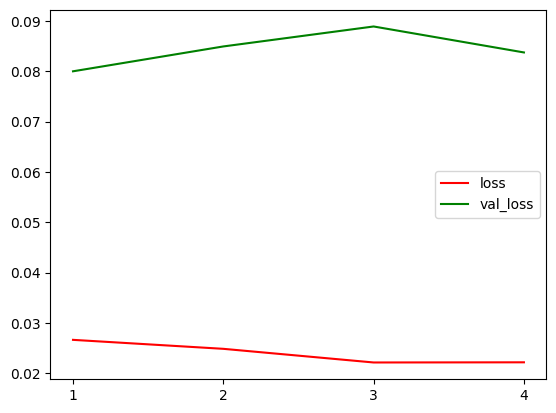

In [7]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    np.arange(1, len(history.history["loss"]) + 1),
    history.history["loss"],
    "r",
    label="loss",
)
plt.plot(
    np.arange(1, len(history.history["loss"]) + 1),
    history.history["val_loss"],
    "g",
    label="val_loss",
)
plt.xticks(ticks=np.arange(1, len(history.history["loss"]) + 1))
plt.legend()

In [8]:
# 評估，打分數
score = model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.07163915038108826, 0.9815000295639038]

## ModelCheckpoint callback

In [10]:
# 定義 ModelCheckpoint callback
checkpoint_filepath = "d1.weights.h5"
# checkpoint_filepath = 'model.{epoch:02d}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,  # 設定存檔名稱
    save_weights_only=True,  # 只存權重
    monitor="val_accuracy",  # 監看驗證資料的準確率
    mode="max",  # 設定save_best_only=True時，best是指 max or min
    save_best_only=True,
)  # 只存最好的模型

EPOCHS = 3  # 訓練 3 次
model.fit(
    x_train_norm,
    y_train,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[model_checkpoint_callback],
)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9793 - val_loss: 0.0905
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9941 - loss: 0.0177 - val_accuracy: 0.9808 - val_loss: 0.0858
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9942 - loss: 0.0162 - val_accuracy: 0.9781 - val_loss: 0.0986


In [11]:
# 再訓練 3 次，觀察 accuracy，會接續上一次，繼續改善 accuracy。
model.fit(
    x_train_norm,
    y_train,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[model_checkpoint_callback],
)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9938 - loss: 0.0184 - val_accuracy: 0.9802 - val_loss: 0.0863
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9956 - loss: 0.0140 - val_accuracy: 0.9779 - val_loss: 0.1122
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9944 - loss: 0.0163 - val_accuracy: 0.9803 - val_loss: 0.0986


## TensorBoard callback

In [ ]:
# 可能會出錯,不再更新
# 定義 tensorboard callback
tensorboard_callback = [
    tf.keras.callbacks.TensorBoard(log_dir=".\\logs", histogram_freq=1)
]

# 訓練 5 次
history = model.fit(
    x_train_norm,
    y_train,
    epochs=5,
    validation_split=0.2,
    callbacks=tensorboard_callback,
)

In [ ]:
# 載入 TensorBoard notebook extension，即可在 jupyter notebook 啟動 Tensorboard
%load_ext tensorboard

# 啟動 Tensorboard
%tensorboard --logdir ./logs

In [ ]:
# 可同時定義多個Callback事件
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath="model.{epoch:02d}.h5"),
    tf.keras.callbacks.TensorBoard(log_dir="./logs"),
]
model.fit(x_train_norm, y_train, epochs=10, callbacks=my_callbacks)